<a href="https://colab.research.google.com/github/sherif201/test-repo/blob/master/Machine_Learning_through_Bayes_theorem_and_Normal_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Machine Learning through Bayes theorem and Normal Distribution

_This post is mostly inspired by the valuable lecture notes from [Andrew Ng Stanford ML course](http://cs229.stanford.edu/notes/), specially 1 and 2. I only added some explanations, annotation, small proofs,...etc, and Python codes to plot the figures._

_There's a bit heavy mathematical notations and proofs, which could be error prone, or have unclear notations sometimes. In case of any of such issues, thanks for pointing them out to fix._

For more details about basics of dealing with normal distrbution in Python, please see this [post](https://colab.research.google.com/drive/15AxNwNIH7OrqxgD_4wNrrIACxRB6g96e).

The common approach to describe machine learning regression and classification is through curve fitting, least square minimization, linear decision boundaries,..etc, which all fit under point estimates of the model parameters.

Another less common approach is through Bayes theory and normal distributions. On one hand, this approach enables uncertainity evaluation in the parameters estimates, and on the other hand, Normal distribution is a natural and very reasonable model assumption to describe many natural phenoma.

In this post, I will describe some regression and classification algorithms under the Bayesian probabilistic framework, with normal distributions as the underlying model assumption. We will use this framework to understand Linear Regression, Logisitic Regression, min distance classifiers and Naive Bayes classifiers.

![Bayes+Normals_4_ML](https://docs.google.com/drawings/d/e/2PACX-1vQQXN5wiuuiHsiT6Ek0byn0TwlLpD9zbM-twvyTZH6a2NN9LYPEeAskhCiJciAbrrXdwqcjKW5gVWkR/pub?w=960&h=720)

I will start first with regression, describing the Gaussian generative models for 1D case and 2D case, and the probablistic interpretation of the least square minimization framework, and finally touching on Bayesian estimation of the model parameters. 

Then I will proceed to the classification problem, describing the difference between generative and discriminative models, and Bayes Decision Theory for classification, leading to Discriminant functions, Decision boundaries and Minimum distance classifiers, and going through Gaussian Discriminant Analysis, and its relation to Logistic Regression framework, Softmax regression and Naive Bayes classification.



In [0]:
#@title Imports (Double click to see code)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import erf, sqrt
from scipy.stats import norm
from scipy.stats import multivariate_normal
from numpy.linalg import norm
from numpy.linalg import inv
from scipy.spatial.distance import mahalanobis
from scipy.stats import norm

## Linear regression

In the setup of regression problem, we want to estimate the value of some dependent variable $y^i$ as a function of independent varibale $X^i$?

Without any modeling assumptions of the underlying probability density function (pdf), let's assume the following linear relation between $X^i$ and our prediction about $y^i$; called $\hat{y}^i$:

$$\hat{y}^i = h_\theta(X^i) = \theta^TX^i$$

Where:

$$X^i = [1, x_1, x_2,..., x_n]$$
$$\theta = [\theta_0, \theta_1, \theta_2, ...,\theta_n]$$

Where $n$ is the dimension of the input data or the number of features.

For an entire data set, we have:
$$X = [(X^1)^T, (X^2)^T,..., (X^m)^T]$$
$X \in {\Bbb R}^{m \times n}$
$$y = [y^1, y^2,....y^m]$$

Where $m$ is number of samples in the data set.

The predictions in matrix form shall be:

$$\hat{y} = h_\theta(X) = X\theta$$

With the objective to minimize the mean square error between :

$$J(\theta) = min_\theta \sum_{i=1}^m \frac{1}{2} (\hat{y}^i - y^i)^2= min_\theta \frac{1}{2}\sum_{i=1}^m(h_\theta(X^i) - y^i)^T(h_\theta(X^i) - y^i)$$

In matrix form:

$$J(\theta) = min_\theta \frac{1}{2}(X\theta - y)^T(X\theta - y)$$
For $n=1$ we get:
$$J(\theta) =  min_\theta \frac{1}{2}\sum_{i=1}^m(h_\theta(x^i) - y^i)^2$$


We can find $\theta$ such that:
$$\theta^* = argmin_\theta J(\theta)$$




It can be solved using  using the __normal equation__ (see [LR](https://colab.research.google.com/drive/1IOtIEE9-V4mfViKF9yt602ROPesjX3uT?authuser=1#scrollTo=zH4oSs4K7zFQ)):

By setting:
$$\nabla_\theta J(\theta) = X^TX\theta - X^Ty = 0$$

We get:

$$\theta^* = (X^T.X)^{-1} . X . y$$

The above equation has high computation cost for large $m$. In many cases $X^{-1}$ does not exist, where we have to use _pseudoinverse_ algorithms.

The minimization can also be solved using __Ordinary Least Squares (OLS)__ and __Least Squares Minimization (LMS)__, 

```
Repeat until convergence:
```
$$\theta^{k+1} = \theta^{k} - \alpha * \frac{\partial J}{\partial \theta} = \theta^{k} + \alpha \sum_{i=1}^m(h_\theta(x^i) - y^i)x^i$$

This is called Batch Gradient Descent (BGD), where the entire training set is used for a single update. It converges to the normal equation at the end. The other extreme is to make the update with single example at a time:

```
Repeat until convergence:  
      Repeat for k in m examples:
```      
$$\theta^{i+1} = \theta^{i} + \alpha (h_\theta(x^i) - y^i)x^i$$


This is called Stochastic Gradient Descent (SGD). It has much less computational cost, but could lead to oscillations in the results until convergence. There is another setting in between, which is to update every small batch of data, which is called mini-batch gradient descent.

# Probablistic interpretation of regression
Another setup that we discuss here, is to fomulate the problem under a probalistic framework as follows:

$$y^i = h_{\theta}(X^i) + \epsilon^i $$

Where $\epsilon$ is an error term that we assume normally distributed:

$$P(\epsilon^i) = N(0,\Sigma)$$

So:

$$P(y^i|X^i;\theta)=N(h_{\theta}(X), \Sigma)=\frac{1}{(2\pi)^{n/2} |\Sigma |^{1/2}} exp (-\frac{1}{2}(y^i-h_\theta(X^i))^T\Sigma^{-1}(y^i-h_\theta(X^i)))$$

__We will see $\Sigma$ exact value is irrelevant__


Now, under the MLE framework, we can formulate a likelihood as follows:

$$L(\theta) = P(y|X;\theta) = \prod_{i=1}^m P(y^i|X^i;\theta)$$

If we take the log of both sides:
$$l(\theta) = log L(\theta) =  \sum_{i=1}^m log P(y^i|X^i;\theta)$$

Since log is monotonic, then maximizing $l(\theta)$ is the same as maximizing $L(\theta)$. 
$$l(\theta) = -m.\frac{n}{2}log 2\pi-m.\frac{1}{2}log \Sigma -\frac{1}{2} \sum_{i=1}^m (y^i-h_\theta(X^i))^T\Sigma^{-1}(y^i-h_\theta(X^i))$$

The first 2 terms are constant with $\theta$, so maximizing $l(\theta)$ is the same as minimizing the last term:

$$J(\theta) = min_\theta \frac{1}{2} \sum_{i=1}^m (y^i-h_\theta(X^i))^T\Sigma^{-1}(y^i-h_\theta(X^i))$$

If we assume $\Sigma = \sigma^2I$, or simply ignoring the constant $\Sigma$ as it will vanish when equating the derivative to 0 anyways:
$$J(\theta) =  min_\theta \frac{1}{2}\sum_{i=1}^m(y^i-h_\theta(X^i))^T(y^i-h_\theta(X^i))$$

Which is the same as the OLS objective.

It can be solved in the same 2 ways we used before:

1- Normal equations

2- LMS

To maximize $l(\theta)$ we set $\nabla_\theta l(\theta) = 0$, which also minimizes $J(\theta)$we get:

$$\nabla_\theta l(\theta) = -\nabla_\theta J(\theta) = -\sum_{i=1}^m(y^i-h_\theta(X^i)).X^i = -X^T(y-h_\theta(X))$$

And again, it's the same update rule as in LMS, and the same derivative leading to the normal equation, setting $\nabla_\theta J(\theta) = 0$, and putting $h_\theta(X) = X\theta$:
$$X^TX\theta=X^Ty$$ 
$$\theta=(X^TX)^{-1}X^Ty$$

__What is the significance of $\mu$?__

Following the same derivation of MLE unbiased estimate of $\mu$, considering our assumption that $\mu = h_\theta(X) = X\theta$:

$$l(\mu) = l(h_\theta(X)) = l(X\theta)$$

Therefore, maximizing $l(\mu)$ is the same as maximizing $l(X\theta)$ or simply $l(\theta)$ since X is not a hyper parameter we search for or change. Following this reasoning, we reach the same value of $\theta$ in the normal equation derived above.

$$l(\mu) = C -\frac{1}{2} \sum_{i=1}^m (y^i-\mu)^T\Sigma^{-1}(y^i-\mu)$$

$$\nabla_\mu(l(\mu)) = \Sigma^{-1} \sum_{i=1}^m (y^i-\mu) = 0$$

However, we cannot naively set $\mu = \frac{1}{m}\sum_{i=1}^m y^i$ as we did in the derivation of the mean estimate, that's because in our case $\mu$ is not constant anymore, but function of $X^i$, so it won't considered constant in the summation over $i$ as before:

$$ \sum_{i=1}^m y^i = \sum_{i=1}^m \mu = \sum_{i=1}^m h_\theta(X^i) = \sum_{i=1}^m \theta^TX^i \neq m \mu $$ 

Multiplying both sides by $X^i$ inside the summation we get:

$$ \sum_{i=1}^m y^i .X^i = \sum_{i=1}^m (\theta^T X^i) X^i$$

Or we can view it as inner products:

$$<X,y> = <X, X\theta>$$

Where each sum now corresponds to inner product: $\sum_{i=1}^m y^i .X^i = <X, y> = X^Ty$, and similarly $\sum_{i=1}^m (\theta^T X^i) X^i = <X, X\theta>= X^TX\theta$.


You can verify by checking the dimensions of both sides.

Therefore, we have:

$$X^Ty = X^TX\theta$$ 
$$\theta=(X^TX)^{-1}X^Ty$$

Which is another way to reach the normal equation through the unbiased MLE estimation of Normal distribution mean.



__What is the significance of $\Sigma$?__

As you can see, the exact value of $\Sigma$ in our assumption about the error term is irrelevant.

In fact, following the unbiased estimate of the variance as before we get:

$$\Sigma = \frac{1}{m-1}\sum_{i=1}^m(y^i-h_\theta(X^i))^T(y^i-h_\theta(X^i))$$

Which is proportional to the __Mean Squared Error (MSE)__ from every true value to the mean prediction.

So as we approximate the relation with normal distribution, the spread of that distriution is simply the error.


# Bayesian Inference

So far, we have assumed the model parameters $\theta$ to take only 1 value (that maximizes the likelihood or equivalently minimizes the error). 



But what if our estimates are mistaken? in other words, how certain are we in that estimate of the parameters $\theta$?

We could quantify our uncertainty in the predictions $\hat{y} = h_\theta(X)$ by measuring the MSE, which is proven to be the uncertainty only when we work under the probabilistic framework with normal assumption.

So how can we quantify the same for our estimate $\theta^*$?

__The answer is by working under the framework of Bayes Theory__

$P(\theta | y, X) = \frac{P(y|X,\theta).P(\theta|X)}{P(y|X)}$

$P(y|X,\theta)$ is the __likelihood__ as above

$P(\theta|X)$ is called the __prior__, which represents any assumptions we want to put on the distribution of the parameters. It could be as simple as $N(0,I)$ or any other complex assumption.

$P(\theta | y, X)$ is the __posterior__, which is the parameters distributions we've been looking for. Knowing the posterior, we can measure the uncertainty in our estimates, and provide a range/confidence interval for the estimates.

$P(y|X)$ is a normalization term

Usually the calculation above is not possible to perform for high dimensions and continous variables. So we use an approach called sampling (like Monte Carlo), which is beyond the scope of this post.

Bayesian Inference and uncertainty quantification is only enabled thanks to the probablistic interpretation of linear regression. In OLS, we have no choice but caculating only point estimates, simply because we had one objective to minimize, and no probability desnity function to model the independent and dependent variables relations. In other words, we did not have any means to develop a __distribution__ of the estimated parameters $\theta$. Having such a dsitribution would enable us to measure its spread (variance), and get an idea about its range, confidence interval, or simply; __uncertainty__




## Bayes rule for Generative models Classification

__Generative processes/models__

With the model of the underlying process or variable at hand (parametric or non-parametric), we can have a __generative__ function that simulates the variable or the process. In other words, we can __sample__ from this model distribution to obtain artificial data points, that are never measured, but are likely to be obtained with certain probability range.



Assuming an underlying distribution of the data generating process  is normal. We can estimate the normal distribution model parameters using MLE.

Now, suppose we change the problem from regression to classification. In other words, the dependent variable $y$ now takes 1 of $k$ values according to the class the input sample $X^i$ belongs to. For convenience, we split $y$ into $y_1$, $y_2$,...$y_k$

$$y \in {y_1, y_2,...y_k} $$

where $k$ is the number of classes.

Usually, $y$ is represented as 1 of $k$ called One-Hot-Encoding (OHE), with $k$
-dimensions vector, with only the position of the class set to 1 and others to 0.


In this case, we cannot have one generating distribution $P(y|X;\theta)$ for all the classes. Instead we need $k$ distributions $P(y_1|X;\theta)$, $P(y_2|X;\theta)$,...$P(y_k|X;\theta)$ for each class.

For any distributions:

$$P(y_i|X;\theta) = \frac{P(X|y_i;\theta).P(y_i)}{P(X)}$$

In the __generative models framework__, given a new sample $X$, we present it to all the pdf's of all classes: $P(y_1|X;\theta)$, $P(y_2|X;\theta)$,...$P(y_k|X;\theta)$, then we predict it to belong to the class $y_k$ that produces the maximum of them.

$$y_i = argmax_i P(y_i|X;\theta)$$

$P(y_i)$ is just the __prior__ of the class probability.

$P(X|y_i;\theta)$ is the __likelihood__ of the sample $X$ to be generated from the $y_i$ class. This can be used to __generate__ samples $X$ from class $y_i$, hence the name __generative models__.

$P(y_i|X;\theta)$ is the __posterior__ probability of class assignment $y_i$ for the sample $X$

$P(X)$ is just a normalization term (so that $P(y_i|X;\theta)$ is a true probability values [0,1]). It does not contribute to the argmax comparison of models. So it can be safely ignored:

$$y_i = argmax_i P(X|y_i;\theta).P(y_i)$$


__Gaussian generative models__

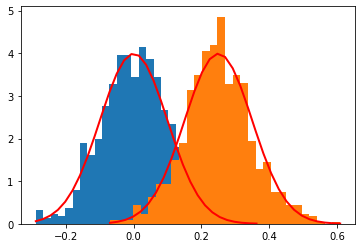

In [0]:
#@title For two classes, if we assume Normal Gaussian likelihoods, we can generate sampels from 1D samples as follows:

mu1, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu1, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu1)**2 / (2 * sigma**2) ), linewidth=2, color='r')

mu2, sigma = 0.25, 0.1 # mean and standard deviation
s = np.random.normal(mu2, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu2)**2 / (2 * sigma**2) ), linewidth=2, color='r')

#plt.axvline(x=opt_thresh-delta, linestyle='--')
#plt.axvline(x=opt_thresh)
#plt.axvline(x=opt_thresh+delta, linestyle='--')


plt.show()

# Decision boundary

Let's simplify the analysis to binary classification setup.

Since we have 2 class posterios, we evaluate and compare 2 values:
$$P(y_1|X;\theta) <> P(y_2|X;\theta)$$

There will be a point at which the 2 values are equal $P(y_1|X;\theta) = P(y_2|X;\theta)$, which we call the __decision boundary__ $x_0$





If we assume Normal Gaussian likelihood, and for the simplest case of equiprobable classes, and same samples spread we get the threshold at:

$$x_0 = \frac{1}{2} (\mu_1 + \mu_2)$$

We will remove these assumptions later and see for the general case.

In [0]:
#@title Plotting error region (Double click to see code)

def plot_area(mu, sigma, limit1, limit2, ax, color):

  x1 = limit1
  x2 = limit2


  x = np.arange(x1, x2, 0.001) # range of x in spec
  p_w1 = np.arange(-10, 10, 0.001) # entire range of x, both in and out of spec
  y = norm.pdf(x,mu,sigma)
  y2 = norm.pdf(p_w1,mu,sigma)

  # build the plot
  #fig, ax = plt.subplots(figsize=(9,6))
  #plt.style.use('fivethirtyeight')
  ax.plot(p_w1,y2)

  ax.fill_between(x,y,0, alpha=0.3, color=color)
  ax.fill_between(p_w1,y2,0, alpha=0.1)
  ax.set_xlim([-1,1])
  ax.set_xlabel('# of Standard Deviations Outside the Mean')
  ax.set_yticklabels([])


0.125


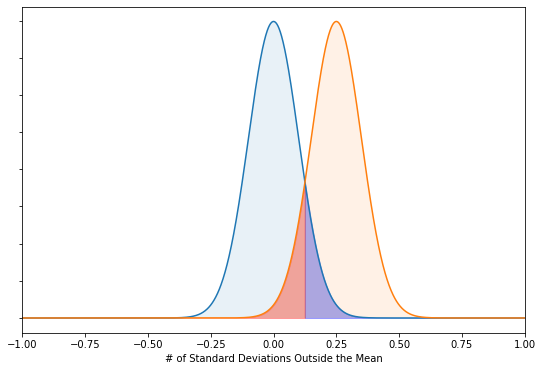

In [0]:
#@title For the equiprobable 1D case:
opt_thresh = 1/2*(mu2+mu1)
delta = 0.05
print(opt_thresh)
thresh = opt_thresh
fig, ax = plt.subplots(figsize=(9,6))
plot_area(mu1, sigma, thresh, 1,ax, 'b')
plot_area(mu2, sigma, -1, thresh,ax, 'r')


## Probability of error
The shaded areas represent the regions where we have a probability of error. Meaning, we could have one posterior larger than the other, while the sample actually belongs to the lower class.

To quantify the probability of error under the Bayes framework, it will be the sum of the two regions:

$$P_{err} = \frac{1}{2}\int_{-\infty}^{x_0} P(y_2|X;\theta)+ \frac{1}{2}\int_{x_0}^{\infty} P(y_1|X;\theta) $$





In [0]:
#@title Perr calculation for 1D case (Double click to see code)
from math import erf, sqrt
def calc_perr(mu1, mu2, sigma, thresh):
  # probability from Z=0 to lower bound
  # CDF: Probability a value is LESS than or equal a value
  P_FN = 1-norm.cdf(thresh, mu1, sigma)#1/2*(1-erf( (mu2-thresh) / (sigma*sqrt(2))))
  P_TP = 1 - P_FN
  #print(P_FN)
  # probability from Z=0 to upper bound
  P_FP = norm.cdf(thresh, mu2, sigma)#1/2*(1-erf( (thresh-mu1) / (sigma*sqrt(2))))
  P_TN = 1 - P_FP
  #print(P_FP)
  P = 1/2*(P_FP+P_FN)
  #print('Perr = ', p)
  return P_FP, P_TP, P_FN, P_TN, P

Left area:  0.2266273523768682
Right area:  0.040059156863817114
Perr:  0.13334325462034266


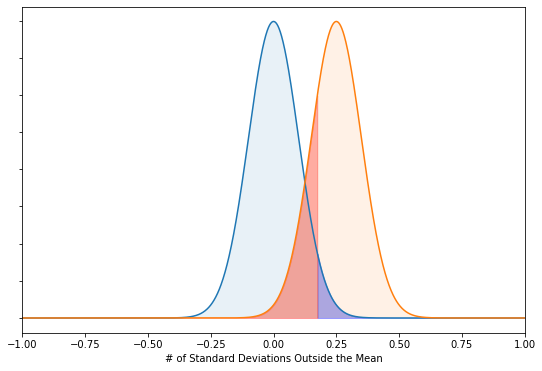

In [0]:
#@title Let's move the threshold up and down and observe how the error region and Perr changes { run: "auto", vertical-output: true }
thresh = 0.175 #@param {type:"slider", min:0, max:1, step:0.025}
fig, ax = plt.subplots(figsize=(9,6))

plot_area(mu1, sigma, thresh, 1,ax, 'b')
plot_area(mu2, sigma, -1, thresh,ax, 'r')
P_FP, P_TP, P_FN, P_TN, P = calc_perr(mu1, mu2, sigma, thresh)
print('Left area: ', P_FP)
print('Right area: ', P_FN)
print('Perr: ', P)


## Optimal decision boundary

As you can see, when we move the threshold around the optimum point, we get higher shaded region and higher Perr.

The Bayes decision point is the optimum, so it is said that Bayes Classifier is the optimum classifier.

But so far, we measure the Perr, which corresponds to the accuracy ($P{correct} = 1-P_{err}$).

# Disciminative Models





If we have models for 2 class probs, then using their __generative__ distributuons $p(x | y)$ we can calculate 2 quantities for each new input x:

$$\hat{P_1}(y=y_1 , x) = P(y=y_1) . P(x | y=y_1)$$
$$\hat{P_2}(y=y_2 , x)= P(y=y_2) . P(x | y=y_2)$$

The 2 generators that represt the __likelihood__ per class are:
$$g_1 = P(x | y=y_1)$$
$$g_2 = P(x | y=y_2)$$

Which we can use to generate samples as we will see shortly.


According to Bayes Classification rule, we can compare $\hat{P_1}$ and $\hat{P_2}$ to get a final classification.

Notice that, $\hat{P_1}$ and $\hat{P_2}$ do not sum to 1. We call $\hat{P_1}$ and $\hat{P_2}$ the __unnormalized probabilities__. 

But if we want to have __one__ function to directly give use the answer, without having to compute both quatities, let's assume a random variable $y$, that takes values from the sample space $y_1$ or $y_2$. If we want a distribution of probability of probabilties over the 2 values we can normalize as follows:

$$P_1(y=y_1 , x) = \frac{\hat{P_1}}{\hat{P_1}+\hat{P_2}}=\frac{1}{1+\frac{\hat{P_2}}{\hat{P_1}}}$$

$$P_2(y=y_2 , x) = \frac{\hat{P_2}}{\hat{P_1}+\hat{P_2}}=\frac{1}{1+\frac{\hat{P_1}}{\hat{P_2}}} = 1-P_1(y=y_1 , x)$$

Now $P_1$ and $P_2$ are normalized. Let:

$$P_1(y=y_1 , x) = \phi$$

So:

$$P_2(y=y_2 , x) = 1-\phi$$

For a combined probabiltiy distribution we can write it as:

$$P(y,x) = \phi^y(1-\phi)^{1-y}$$

This is called __Bernoulli distribution__.


__Discriminant functions:__

Now, how to get $\phi$

With a simple trick:

$$\frac{\hat{P_2}}{\hat{P_1}} = exp(log(\frac{\hat{P_2}}{\hat{P_1}}) = exp(-(log(\hat{P_1}) - log(\hat{P_2}))) = exp(-g(x))$$

Where:

$$g(x) = log(\hat{P_1}) - log(\hat{P_2})$$

$g(x)$ is called the __Discriminant Function__. It also maps to a __Decision boundary or plane_ for reason we will know shortly.

## Logistic Regression
We reach to the below formula

$$\phi = \frac{1}{1+exp(-g(x))}$$

If we know $g_1$ and $g_2$, or at least can assume them, then we can evaluate $g(x)$ exactly. (Note that, the class priors $P(y=y_1)$ and $P(y=y_2)$ are easily obtained by counting.)

Otherwise, we can assume a certain shape for the boundary. We can assume a linear function $g(x) = \theta^Tx$

$$P(y=y_1, x) = \frac{1}{1+exp(-\theta^Tx)}$$

The above formula is similar to the logistic or sigmoid function. Hence the name __Logistic Regression__. The name _regression_ is confusing, but it's still used for classification.

# Gaussian Discriminant Analysis (GDA)
If we put an assumption on both $\hat{P_1}$ and $\hat{P_2}$ to be Gaussian generation distributions


For $n$ - dimensions:

$$\hat{P_i}(X) = P(y=y_i, X; \mu_i, \Sigma_i) = P(y_i) . P(X | y=c_i; \mu_i, \Sigma_i)= P(y_i) . \frac{1}{(2\pi)^{n/2} |\Sigma_i |^{1/2}} exp (-\frac{1}{2}(X-\mu_i)^T\Sigma_i^{-1}(X-\mu_i))$$

$$X = [x_1, x_2,....x_{n}]$$

$$\mu_i = [\mu_1, \mu_2,....\mu_{n}]$$



$$ \Sigma = 
\begin{bmatrix}
\sigma_{11}^2 & \sigma_{12}^2 & ... & \sigma_{1n}^2\\
\sigma_{21}^2 & \sigma_{22}^2 & ... & \sigma_{2n}^2\\
...\\
\sigma_{n1}^2 & \sigma_{n2}^2 & ... & \sigma_{nn}^2\\
\end{bmatrix}
$$

__Bivariate normal distribution__

For 2D:
$$X = [x_1, x_2]$$

$$\mu_i = [\mu_{x_1}, \mu_{x_2}]$$


$$ \Sigma = 
\begin{bmatrix}
\sigma_{xx}^2 & \sigma_{xy}^2\\
\sigma_{yx}^2 & \sigma_{yy}^2\\
\end{bmatrix}
$$

The off diagnols are the covariances.


__Now to calculate $g(x)$__

Let's first calculate $log(g_i(X))$

$$log(\hat{P_i}(X)) = -C_i-\frac{1}{2}(X-\mu_i)^T\Sigma_i^{-1}(X-\mu_i)$$

$$C_i = log(P(y_i)) -n/2*log (2\pi) -1/2*log |\Sigma_i |$$

Using the property in 1D:

$$(x-\mu)^2 = x^2 + \mu^2 -2x\mu$$

Then in higher dimensions we have:
$$(x-\mu)^T(x-\mu) = x^Tx + \mu^T\mu -2\mu^Tx$$




and if we have 2 distributions with covariance between them:
$$(x-\mu_i)^T\Sigma_i^{-1}(x-\mu_i) = x^T\Sigma_i^{-1}x + \mu_i^T\Sigma_i^{-1}\mu_i -2\mu_i^T\Sigma_i^{-1}x$$

__Deicion Hyperplane__

The terms $x^T\Sigma_i^{-1}x$ are called the quadratic terms.

to get $g(x)$:

$$g(x) = log(\hat{P_1}) - log(\hat{P_2})$$

If we further assume $\Sigma_i=\Sigma$, the quadratic terms $x^T\Sigma_i^{-1}x = x^T\Sigma^{-1}x$ will cancel out then we get a __linear decision boundary__:

$$g(x) = W^T(x-x_0)$$

$$W = \Sigma^{-1}(\mu_1 - \mu_2)$$
$$x_0 = \frac{1}{2}(\mu_1 + \mu_2) - \Sigma \frac{(\mu_1-\mu_2)}{||\mu_1-\mu_2||^2}\frac{P(y_1)}{P(y_2)}$$



__1D__

In case of linear 1D boundary $\sigma_i=\sigma$, we have the formula for the linear decision hyper plane:

$$g(x) = W^T(x-x_0)=0$$

So the equation of the plane is:
$$x=x_0$$

Which is the vertical line we draw at $x_0$

In [0]:
#@title Optimum boundary calculation (Double click to unhide code)
def calc_opt_thresh(mu1, mu2, p1, p2, sigma):
  return (mu1 + mu2)/2 - sigma**2 * np.log(p1/p2) * (mu1-mu2)/np.linalg.norm(mu1-mu2)**2

In [0]:
#@title Plot error region for unbalanced 1D case (Double click to unhide)

def plot_unbalanced_area(mu, sigma, p, limit1, limit2, ax, color):

  x1 = limit1
  x2 = limit2


  x = np.arange(x1, x2, 0.001) # range of x in spec
  p_w1 = np.arange(-10, 10, 0.001) # entire range of x, both in and out of spec
  y = p*norm.pdf(x,mu,sigma)
  y2 = p*norm.pdf(p_w1,mu,sigma)

  # build the plot
  #fig, ax = plt.subplots(figsize=(9,6))
  #plt.style.use('fivethirtyeight')
  ax.plot(p_w1,y2)

  ax.fill_between(x,y,0, alpha=0.3, color=color)
  ax.fill_between(p_w1,y2,0, alpha=0.1)
  ax.set_xlim([-1,1])
  ax.set_xlabel('# of Standard Deviations Outside the Mean')
  ax.set_yticklabels([])



In the above analysis, we assumed that $\Sigma_i=\Sigma$ or in 1D $\sigma_i=\sigma$, which enabled us to arrive to a linear decision boundary.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in subtract


Text(0.5, 0, '# of Standard Deviations Outside the Mean')

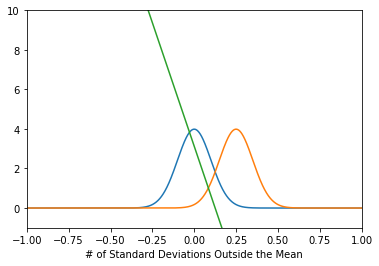

In [0]:
#@title Double click to see code
x = np.arange(-10, 10, 0.001) 

# dist 1
mu_1 = 0
sigma_1 = 0.1
p_1 = 1
p_1_hat = p_1 * norm.pdf(x,mu_1,sigma_1)
plt.plot(x,p_1_hat)

# dist 2
mu_2 = 0.25
sigma_2 = 0.1
p_2 = 1
p_2_hat = p_2 * norm.pdf(x,mu_2,sigma_2)
plt.plot(x,p_2_hat)

# boundary y = w^T(x-x0) = 0
g = np.log(p_1_hat) - np.log(p_2_hat)
#w = (mu_1-mu_2)/sigma_1**2
#x_0 = calc_opt_thresh(mu_1, mu_2, p_1, p_2, sigma_1)
#g = w * (x - x_0)

plt.plot(x,g)

plt.xlim([-1,1])
plt.ylim([-1,10])
plt.xlabel('# of Standard Deviations Outside the Mean')



Note that, the above plots are for $g(x)$ for any value of $x$, which is normally a straight line.

However, we are only interested to plot the values of $x$ that make $g(x)=0$, which only exist at $x=x_0$ by solving the equation (as you see above, it's the point the line g(x) intercepts the x axis or zero crossing)

__How to interpret this?__


__$g(x)$ is a distance metric!__

So the straight line above denotes the distance from the points from the decion boundary. Far points will have large absolute value for $g(x)$, while near ones will be zeros

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in subtract


Text(0.5, 0, '# of Standard Deviations Outside the Mean')

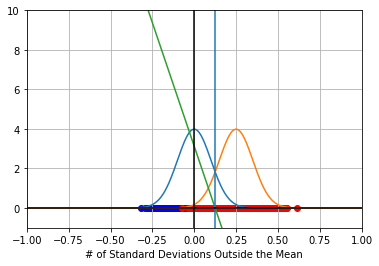

In [0]:
#@title Double click to see code
size = 1000
x = np.arange(-10, 10, 1/size) 

# dist 1
mu_1 = 0
sigma_1 = 0.1
p_1 = 1
p_1_hat = p_1 * norm.pdf(x,mu_1,sigma_1)
plt.plot(x,p_1_hat)
x_1 = p_1 * np.random.normal(mu_1, sigma_1, size)
plt.scatter(x_1,x_1*0,c='b')

# dist 2
mu_2 = 0.25
sigma_2 = 0.1
p_2 = 1
p_2_hat = p_2 * norm.pdf(x,mu_2,sigma_2)
plt.plot(x,p_2_hat)

x_2 = p_2 * np.random.normal(mu_2, sigma_2, size)
plt.scatter(x_2,x_2*0,c='r')

# boundary y = w^T(x-x0) = 0
g = np.log(p_1_hat) - np.log(p_2_hat)
#w = (mu_1-mu_2)/sigma_1**2
x_0 = calc_opt_thresh(mu_1, mu_2, p_1, p_2, sigma_1)
#g = w * (x - x_0)

plt.plot(x,g)

plt.xlim([-1,1])
plt.ylim([-1,10])
plt.axvline(x=x_0)


plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('# of Standard Deviations Outside the Mean')


__2D__

In [0]:
#@title Multivariate normal PDF calculation (Double click to see code)
def calc_p_normal(X, mu, cov):
  return multivariate_normal.pdf(X, mu, cov)

In [0]:
#@title Normal 2D plot (Double click to see code)
def normal_scatter(mean, cov, p):
  
  size = 100
  sigma_x = cov[0,0]
  sigma_y = cov[1,1]
  mu_x = mean[0]
  mu_y = mean[1]

  x_ps, y_ps = np.random.multivariate_normal(mean, cov, size).T

  
  x,y = np.mgrid[mu_x-3*sigma_x:mu_x+3*sigma_x:1/size, mu_y-3*sigma_y:mu_y+3*sigma_y:1/size]
  grid = np.empty(x.shape + (2,))
  grid[:, :, 0] = x; grid[:, :, 1] = y
  

  #z = 1/(2*np.pi*sigma_x*sigma_y) * np.exp(-1/(1-rho**2)*((x-mu_x)**2/(sigma_x**2) + (y-mu_y)**2/(sigma_y**2)-  2*rho*(x-mu_x)/sigma_x*(y-mu_y)/sigma_y))
  z = p*calc_p_normal(grid, mean, cov)

  return x_ps, y_ps, x,y,z




$g(X)=g(x_1,x_2)$ is 2D function, not line.

But since g is a distance metric (see below), then it will assign every point in the grid to a value based on its distance from the decision boundary.

Near points will have 0
Far points will have small value



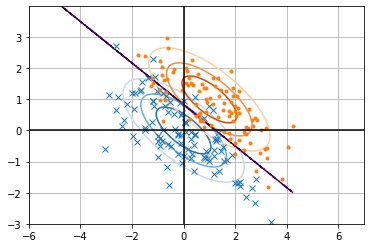

In [0]:
#@title So `contour` function should be used to plot
# Dist 1
mu_1 = np.array([0, 0])
cov_1 = np.array([[2, -1], [-1, 1]])
p_1 = 1
x_ps, y_ps, x,y,z = normal_scatter(mu_1, cov_1, p_1)
p_1_hat = z
plt.plot(x_ps,y_ps,'x')
plt.contour(x, y, z, cmap='Blues', levels=3)

# Dist 2
mu_2 = np.array([1, 1])
cov_2 = np.array([[2, -1], [-1, 1]])
p_2 = 1
x_ps, y_ps, x,y,z = normal_scatter(mu_2, cov_2, p_2)
p_2_hat = z
plt.plot(x_ps,y_ps,'.')
plt.contour(x, y, z, cmap='Oranges', levels=3)

# Decision Boundary
#g = np.log(p_1_hat) - np.log(p_2_hat)
#g = p_1_hat - p_2_hat
X = np.empty(x.shape + (2,))
X[:, :, 0] = x; X[:, :, 1] = y
#g = W.T.dot(X-np.reshape(x_0, (1,2)))
#g = (X-x_0).dot(W)
#g = p_1*multivariate_normal.pdf(X, mu_1, cov_1) - p_2*multivariate_normal.pdf(X, mu_2, cov_2)
#g = np.log(p_1*multivariate_normal.pdf(X, mu_1, cov_1)) - np.log(p_2*multivariate_normal.pdf(X, mu_2, cov_2))
g = np.log(p_1*calc_p_normal(X, mu_1, cov_1)) - np.log(p_2*calc_p_normal(X, mu_2, cov_2))


#plt.contour(x, y, (g>0)*1, [0])
plt.contour(x, y, g, [0])

plt.grid()
#plt.xlim(mu_x-3*sigma_x, mu_x+3*sigma_x)
#plt.ylim(mu_y-3*sigma_y, mu_y+3*sigma_y)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()


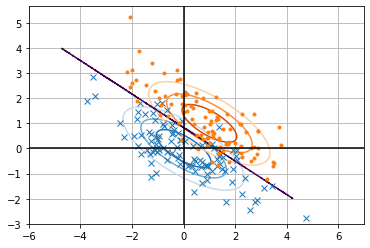

In [0]:
#@title Using the equation of linear boundary:

# Dist 1
mu_1 = np.array([0, 0])
cov_1 = np.array([[2, -1], [-1, 1]])
p_1 = 1
x_ps, y_ps, x,y,z = normal_scatter(mu_1, cov_1, p_1)
p_1_hat = z
plt.plot(x_ps,y_ps,'x')
plt.contour(x, y, z, cmap='Blues', levels=3)

# Dist 2
mu_2 = np.array([1, 1])
cov_2 = np.array([[2, -1], [-1, 1]])
p_2 = 1
x_ps, y_ps, x,y,z = normal_scatter(mu_2, cov_2, p_2)
p_2_hat = z
plt.plot(x_ps,y_ps,'.')
plt.contour(x, y, z, cmap='Oranges', levels=3)

# Decision Boundary
#g = np.log(p_1_hat) - np.log(p_2_hat)
W = inv(cov_1).dot(mu_1-mu_2)
#W = np.expand_dims(W,-1)
#x_0 = 1/2*(mu_1+mu_2) - cov_1.dot(np.log(p_1/p_2)).dot((mu_1-mu_2)/norm(mu_1-mu_2))
x_0 = 1/2*(mu_1+mu_2) - cov_1.dot(np.log(p_1/p_2)).dot((mu_1-mu_2)/mahalanobis(mu_1, mu_2, cov_1))
X = np.empty(x.shape + (2,))
X[:, :, 0] = x; X[:, :, 1] = y
#g = W.T.dot(X-np.reshape(x_0, (1,2)))
g = (X-x_0).dot(W)


#plt.contour(x, y, (g>0)*1, [0])
plt.contour(x, y, g, [0])

plt.grid()
#plt.xlim(mu_x-3*sigma_x, mu_x+3*sigma_x)
#plt.ylim(mu_y-3*sigma_y, mu_y+3*sigma_y)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()


__Effect of class probabilities__

$$x_0 = \frac{1}{2}(\mu_1 + \mu_2) - \Sigma \frac{(\mu_1-\mu_2)}{||\mu_1-\mu_2||_{\Sigma^{-1}}^2}\frac{P(y_1)}{P(y_2)}$$


The norm in the denominator is the square of the __Mahalanobis distance__ between the 2 means:

$$||\mu_1-\mu_2||_{\Sigma^{-1}}^2 = (\mu_1-\mu_2)^T\Sigma^{-1}(\mu_1-\mu_2)$$

As you can see in the threshold equation of $x_0$, in case of equiprobable classes, we get a decision boundary that is exactly in the middle of the two means. This is the same as a sigmoid, where the threshold is at the middle.

In case of one class probability higher, $x_0$ is __pulled__ towards the class with __lower__ probability (pushing it), giving more decision region for the class with higher probability.

__Imbalanced classes__

This observation give us sense of the effect of imbalanced classes, where one class dominates the other.

__1D__

This boundary is optimal even in case of __unbalanced classes__ $P(y_1) \neq P(y_2)$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in subtract


Text(0.5, 0, '# of Standard Deviations Outside the Mean')

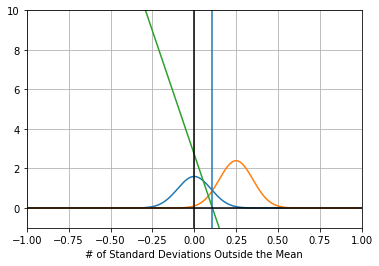

In [0]:
#@title 1D decision boundary plot (Double click to see code)
x = np.arange(-10, 10, 0.001) 

# dist 1
mu_1 = 0
sigma_1 = 0.1
p_1 = .4
p_1_hat = p_1 * norm.pdf(x,mu_1,sigma_1)
plt.plot(x,p_1_hat)

# dist 2
mu_2 = 0.25
sigma_2 = 0.1
p_2 = .6
p_2_hat = p_2 * norm.pdf(x,mu_2,sigma_2)
plt.plot(x,p_2_hat)

# boundary y = w^T(x-x0) = 0
g = np.log(p_1_hat) - np.log(p_2_hat)
#w = (mu_1-mu_2)/sigma_1**2
x_0 = calc_opt_thresh(mu_1, mu_2, p_1, p_2, sigma_1)
#g = w * (x - x_0)

plt.plot(x,g)

plt.xlim([-1,1])
plt.ylim([-1,10])
plt.axvline(x=x_0)


plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('# of Standard Deviations Outside the Mean')


In case of unbalanced classes, naively taking the optimum treshold as the mid point of means gives higher error region:

In [0]:
#@title Perr for unbalanced classes (Double click to see code)
def calc_perr_unbalanced(mu1, mu2, p1, p2, sigma, thresh):
  # probability from Z=0 to lower bound
  # CDF: Probability a value is LESS than or equal a value
  P_FN = 1-p1*norm.cdf(thresh, mu1, sigma)#1/2*(1-erf( (mu2-thresh) / (sigma*sqrt(2))))
  P_TP = 1 - P_FN
  #print(P_FN)
  # probability from Z=0 to upper bound
  P_FP = p2*norm.cdf(thresh, mu2, sigma)#1/2*(1-erf( (thresh-mu1) / (sigma*sqrt(2))))
  P_TN = 1 - P_FP
  #print(P_FP)
  P = 1/2*(P_FP+P_FN)
  #print('Perr = ', p)
  return P_FP, P_TP, P_FN, P_TN, P

Left area:  0.02112995473337107
Right area:  0.2845198189334842
Perr:  0.15282488683342765


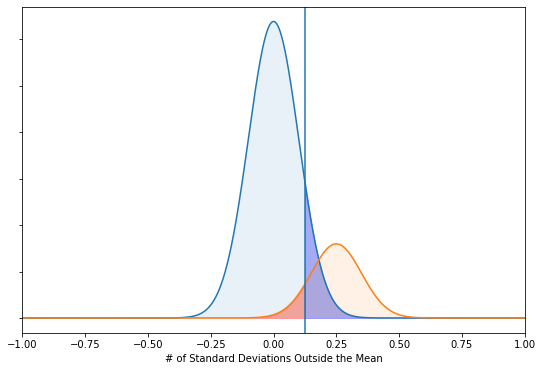

In [0]:
# Equiprobable/Imbalanced
mu1 = 0
mu2 = 0.25
p1 = 0.8
p2 = 0.2
sigma = 0.1

fig, ax = plt.subplots(figsize=(9,6))

opt_thresh = (mu1 + mu2)/2#calc_opt_thresh(mu1, mu2, p1, p2, sigma)#(mu1 + mu2)/2 - sigma1**2 * np.log(p1/p2) * (mu1-mu2)/np.linalg.norm(mu1-mu2)**2
thresh = opt_thresh
plot_unbalanced_area(mu1, sigma, p1, thresh, 1, ax, 'b')
plot_unbalanced_area(mu2, sigma, p2, -1, thresh, ax, 'r')

#plt.axvline(x=opt_thresh+3*sigma, linestyle='--')
plt.axvline(x=opt_thresh)
#plt.axvline(x=opt_thresh-3*sigma, linestyle='--')

P_FP, P_TP, P_FN, P_TN, P = calc_perr_unbalanced(mu1, mu2, p1, p2, sigma, thresh)
print('Left area: ', P_FP)
print('Right area: ', P_FN)
print('Perr: ', P)


Left area:  0.048675312765529444
Right area:  0.22846007199434348
Perr:  0.13856769237993646


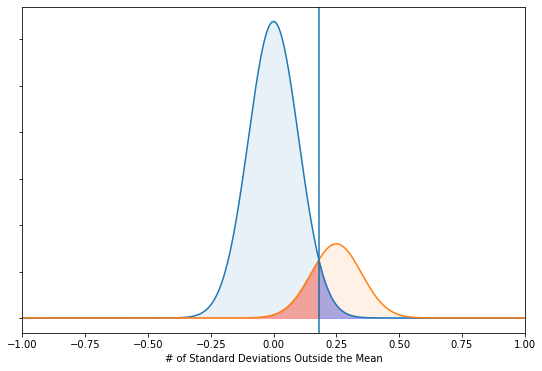

In [0]:
#@title But if we follow the correct formula above:
# Equiprobable/Imbalanced
mu1 = 0
mu2 = 0.25
p1 = 0.8
p2 = 0.2
sigma = 0.1

fig, ax = plt.subplots(figsize=(9,6))

opt_thresh = calc_opt_thresh(mu1, mu2, p1, p2, sigma)#(mu1 + mu2)/2 - sigma1**2 * np.log(p1/p2) * (mu1-mu2)/np.linalg.norm(mu1-mu2)**2
thresh = opt_thresh
plot_unbalanced_area(mu1, sigma, p1, thresh, 1, ax, 'b')
plot_unbalanced_area(mu2, sigma, p2, -1, thresh, ax, 'r')

#plt.axvline(x=opt_thresh+3*sigma, linestyle='--')
plt.axvline(x=opt_thresh)
#plt.axvline(x=opt_thresh-3*sigma, linestyle='--')

P_FP, P_TP, P_FN, P_TN, P = calc_perr_unbalanced(mu1, mu2, p1, p2, sigma, thresh)
print('Left area: ', P_FP)
print('Right area: ', P_FN)
print('Perr: ', P)

As you can see, with the optimum threshold, we always get the min probability of error (min error region area).

__2D__

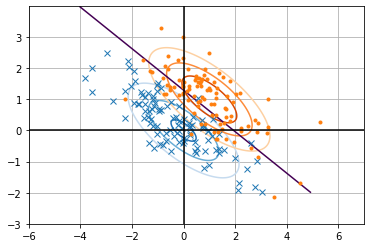

In [0]:
#@title  As you can see, the boundary is pulled towards the lower probability class
# Dist 1
mu_1 = np.array([0, 0])
cov_1 = np.array([[2, -1], [-1, 1]])
p_1 = .8
x_ps, y_ps, x,y,z = normal_scatter(mu_1, cov_1, p_1)
plt.plot(x_ps,y_ps,'x')
plt.contour(x, y, z, cmap='Blues', levels=3)

# Dist 2
mu_2 = np.array([1, 1])
cov_2 = np.array([[2, -1], [-1, 1]])
p_2 = .2
x_ps, y_ps, x,y,z = normal_scatter(mu_2, cov_2, p_2)
plt.plot(x_ps,y_ps,'.')
plt.contour(x, y, z, cmap='Oranges', levels=3)

# Decision Boundary
X = np.empty(x.shape + (2,))
X[:, :, 0] = x; X[:, :, 1] = y
g = np.log(p_1*calc_p_normal(X, mu_1, cov_1)) - np.log(p_2*calc_p_normal(X, mu_2, cov_2))


plt.contour(x, y, g, [0])

plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()


As you can see, the boundary is pulled towards the lower probability class

__Effect of dominant classes__

The imbalanced class probabilities maps to imbalanced datasets cases (example [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud).
This is common in many problems, especially in medical diagnosis field, where usually the most common case is that people do not suffer a certain disease (negative class), while the diagnosed subjects are more rare (positive class). In practice, we usually focus on the positive class, since it is the less dominant one. And usually in the applications (especially medical ones), this is the important class that we don't want to misdetect or misclassify.

This has the same effect as the case with different class probabilities (in fact the larger number of samples from one class automatically increases its probability). 

In general the higher class probability pushes away the decision threshold towards the lower one, meaning to increase the chances the higher class gets predicted. This increases the precision, but highly reduces the recall. See [this post for more details](https://colab.research.google.com/drive/1Y8benxCZnZwDALlp9EnZ46g0sfMc3isX#scrollTo=NyhryOzZTTEJ)


There are many ways to deal with the issue of imbalanced datasets, like oversampling, undersampling, ...etc or even framing the problem as outlier detection. But this is outside the scope of this post.

# Non-linear Decision Boundary
__But what happends if $\Sigma \neq \Sigma_i$__?


Let's now consider the general case:

$$g(x) = log(\hat{P_1}) - log(\hat{P_2})$$

Where each $\hat{P_i}$ is the unnormalized probability:

$$\hat{P_1}(y=y_i , x) = P(y=y_i) . P(x | y=y_i)$$

For normal distribution of the generative likelihood:

$$\hat{P_i}(X) = P(y=y_i, X; \mu_i, \Sigma_i) = P(y_i) . P(X | y=c_i; \mu_i, \Sigma_i)= P(y_i) . \frac{1}{(2\pi)^{n/2} |\Sigma_i |^{1/2}} exp (-\frac{1}{2}(X-\mu_i)^T\Sigma_i^{-1}(X-\mu_i))$$


The above can be evaluated by calculating the equation, simply by calculating the normal pdf at each input point from the given classes.

We will use scipy norm.pdf for that purpose:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in subtract


Text(0.5, 0, '# of Standard Deviations Outside the Mean')

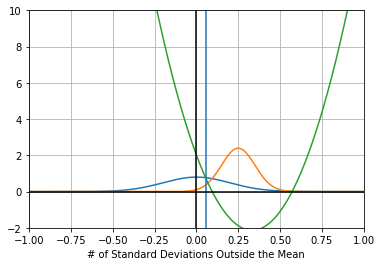

In [0]:
#@title Non linear boundary 1D (Double click to see code)
size = 10000
x = np.arange(-10, 10, 1/size) 

# dist 1
mu_1 = 0
sigma_1 = 0.2
p_1 = .4
#x_1 = p_1 * np.random.normal(mu_1, sigma_1, size)
#plt.scatter(x_1,x_1*0,c='b')
p_1_hat = p_1 * norm.pdf(x,mu_1,sigma_1)
plt.plot(x,p_1_hat)

# dist 2
mu_2 = 0.25
sigma_2 = 0.1
p_2 = .6
#x_2 = p_2 * np.random.normal(mu_2, sigma_2, size)
#plt.scatter(x_2,x_2*0,c='r')
p_2_hat = p_2 * norm.pdf(x,mu_2,sigma_2)
plt.plot(x,p_2_hat)


# boundary y = w^T(x-x0) = 0
g = np.log(p_1_hat) - np.log(p_2_hat)
#w = (mu_1-mu_2)/sigma_1**2
x_0 = calc_opt_thresh(mu_1, mu_2, p_1, p_2, sigma_1)
#g = w * (x - x_0)

plt.plot(x,g)

plt.xlim([-1,1])
plt.ylim([-2,10])
plt.axvline(x=x_0)


plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('# of Standard Deviations Outside the Mean')



Observations:

1- The decision boundary $g(x)$is no longer linear as expected, since the quadratic terms remain

2- The optimal decision boundary is no longer at $x_0$, but it's at the point $\hat{P_1} = \hat{P_2}$, which is the same at the zero crossing of $g(x)=0$



Now, let's test for different $\Sigma_i \neq \Sigma$

This should correspond to the non linear boundary

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


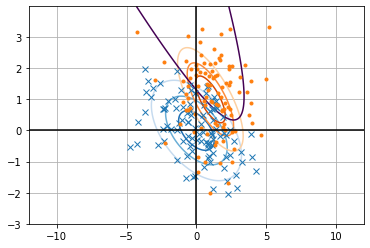

In [0]:
#@title Non linear boundary 2D (Double click to see code)
# Dist 1
mu_1 = np.array([0, 0])
cov_1 = np.array([[4, -1], [-1, 1]])
p_1 = .8
x_ps, y_ps, x,y,z = normal_scatter(mu_1, cov_1, p_1)
plt.plot(x_ps,y_ps,'x')
plt.contour(x, y, z, cmap='Blues', levels=3)

# Dist 2
mu_2 = np.array([1, 1])
cov_2 = np.array([[2, 1], [-1, 1]])
p_2 = .2
x_ps, y_ps, x,y,z = normal_scatter(mu_2, cov_2, p_2)
plt.plot(x_ps,y_ps,'.')
plt.contour(x, y, z, cmap='Oranges', levels=3)

# Decision Boundary
X = np.empty(x.shape + (2,))
X[:, :, 0] = x; X[:, :, 1] = y
g = np.log(p_1*calc_p_normal(X, mu_1, cov_1)) - np.log(p_2*calc_p_normal(X, mu_2, cov_2))


plt.contour(x, y, g, [0])

plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract


Text(0.5, 0, '# of Standard Deviations Outside the Mean')

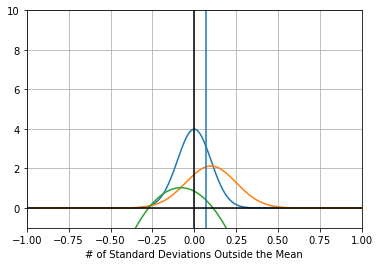

In [0]:
#@title Your turn: play with the parameters and see the effect on the boundary { run: "auto", vertical-output: true }
mu_1 = 0 #@param {type:"slider", min:0, max:1, step:0.05}
sigma_1 = 0.1 #@param {type:"slider", min:0, max:1, step:0.025}
p_1 = 1 #@param {type:"slider", min:0, max:1, step:0.025}

mu_2 = 0.1 #@param {type:"slider", min:0, max:1, step:0.05}
sigma_2 = 0.15 #@param {type:"slider", min:0, max:1, step:0.05}
p_2 = 0.8 #@param {type:"slider", min:0, max:1, step:0.025}

x = np.arange(-10, 10, 0.001) 


p_1_hat = p_1 * norm.pdf(x,mu_1,sigma_1)
plt.plot(x,p_1_hat)


p_2_hat = p_2 * norm.pdf(x,mu_2,sigma_2)
plt.plot(x,p_2_hat)

# boundary y = w^T(x-x0) = 0
g = np.log(p_1_hat) - np.log(p_2_hat)
#w = (mu_1-mu_2)/sigma_1**2
x_0 = calc_opt_thresh(mu_1, mu_2, p_1, p_2, sigma_1)
#g = w * (x - x_0)

plt.plot(x,g)

plt.xlim([-1,1])
plt.ylim([-1,10])
plt.axvline(x=x_0)


plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('# of Standard Deviations Outside the Mean')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


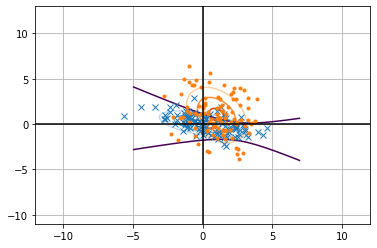

In [0]:
#@title Repeat for 2D case: play with the parameters and see the effect on the boundary { run: "auto", vertical-output: true }
mu_11 = 0 #@param {type:"slider", min:-1, max:1, step:0.05}
mu_12 = 0 #@param {type:"slider", min:-1, max:1, step:0.05}
sigma1_11 = 4 #@param {type:"slider", min:-10, max:10, step:0.025}
sigma1_12 = -1 #@param {type:"slider", min:-10, max:10, step:0.025}
sigma1_21 = -1 #@param {type:"slider", min:-10, max:10, step:0.025}
sigma1_22 = 0.875 #@param {type:"slider", min:-10, max:10, step:0.025}
p_1 = 1 #@param {type:"slider", min:0, max:1, step:0.025}

mu_21 = 1 #@param {type:"slider", min:0, max:1, step:0.05}
mu_22 = 1 #@param {type:"slider", min:0, max:1, step:0.05}
sigma2_11 = 2#@param {type:"slider", min:-10, max:10, step:0.025}
sigma2_12 = 1 #@param {type:"slider", min:-10, max:10, step:0.025}
sigma2_21 = -1 #@param {type:"slider", min:-10, max:10, step:0.025}
sigma2_22 = 4 #@param {type:"slider", min:-10, max:10, step:0.025}
p_1 = 1 #@param {type:"slider", min:0, max:1, step:0.025}
p_2 = 0.8 #@param {type:"slider", min:0, max:1, step:0.025}

mu_1 = np.array([mu_11, mu_12])
cov_1 = np.array([[sigma1_11, sigma1_12], [sigma1_21, sigma1_22]])

x_ps, y_ps, x,y,z = normal_scatter(mu_1, cov_1, p_1)
plt.plot(x_ps,y_ps,'x')
plt.contour(x, y, z, cmap='Blues', levels=3)

# Dist 2
mu_2 = np.array([mu_21, mu_22])
cov_2 = np.array([[sigma2_11, sigma2_12], [sigma2_21, sigma2_22]])

x_ps, y_ps, x,y,z = normal_scatter(mu_2, cov_2, p_2)
plt.plot(x_ps,y_ps,'.')
plt.contour(x, y, z, cmap='Oranges', levels=3)

# Decision Boundary
X = np.empty(x.shape + (2,))
X[:, :, 0] = x; X[:, :, 1] = y
g = np.log(p_1*calc_p_normal(X, mu_1, cov_1)) - np.log(p_2*calc_p_normal(X, mu_2, cov_2))


plt.contour(x, y, g, [0])

plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()


__Note that, not all values will work!__

$\Sigma$ must have an inverse (more precisely it must be positive definite)

# GDA and LogReg

Let:
$$ \theta =
\begin{bmatrix}
W\\
-x_0^TW\\
\end{bmatrix}
$$

$$ X =
\begin{bmatrix}
x\\
1
\end{bmatrix}
$$

So:

$$g(x) = \theta^TX$$

And we get the same formula of LogReg:


$$\phi=P(y=y_1 | x) = \frac{1}{1+exp(-\theta^TX)}$$

__But with one big difference__

As you can see above, $\theta = f(\mu_1, \mu_2, \Sigma, P(y_1), P(y_2)$
This is a feature of _parametric_ estimation, where we assume Gaussian distributions for both classes, and our job is to estimate the distribution parameters.

While in LogReg, $\theta$ was obtained by LMS and SGD.

__So how can we calculate the 2 distributions parameters?__

The answer is using the unbiased estimates of mean and variances of Gaussian distributions, or simply by counting:

$$\mu_i = \frac{x(i)}{m_i} $$

Where $i$ are the indices of the samples from class i, and $m_i$ is the count of those samples

Similarly (assuming $\Sigma_i = \Sigma$ for linear boundary):

$$\Sigma = \frac{1}{m} \sum_j^m (x(j) - \mu_{y(j)})(x(j) - \mu_{y(j)})^T$$

Where $y(j) = 0,1$ according to the class of the sample $j$. $m$ is the total number of samples.

Also, 

$$P(y_i) = \frac{m_i}{m}$$

__GDA or LogReg?__

GDA puts harder assumption that both classes are Gaussian distributed. LogReg doesn't, so it's more general and _less sensitive_ to modeling assumptions. But if the assumption is true, GDA achieves better results.

As you can see above, in GDA, we don't use SGD to estimate $\theta$, but we use out estimates of Gaussian dist parameters. This will be very wrong if the true dist of $y_1$ and $y_2$ samples are Poisson for example or any other dist. But if the assumption is correct, our estimates are actually better than SGD in normal LogReg setup.




__Min distance classifier__

For __equiprobable__ classes P(y_1)=P(y_2), if we get back to the generative functions:

$$\hat{P_1}(y=y_1 , x) = P(y=y_1) . P(x | y=y_1)$$
$$\hat{P_2}(y=y_2 , x)= P(y=y_2) . P(x | y=y_2)$$

The 2 generators that represt the __likelihood__ per class are:
$$g_1 = P(x | y=y_1)$$
$$g_2 = P(x | y=y_2)$$

The decision hyperplane will only be affected by $g_1$ and $g_2$ and not $\hat{P_1}$ or $\hat{P_2}$, since:

$$\frac{\hat{P_2}}{\hat{P_1}} = \frac{g_2}{g_1}$$

In this case, we can simply compare $log(g_1)$ and $log(g_2)$, which will be proportional to the following term:

$$log(g_i) \propto d_i(X) = (X-\mu_i)^T\Sigma_i^{-1}(X-\mu_i)$$


_Back to generative case_

Now given a new value $X^i$, we can do as in the generative models, and plug it to $d_i(X)$ and assign the class as follows:

$$i = argmax_i d_i(X)$$

This is a __distance metric__ between $X$ and the __means__ of both classes.
Hence the name __Minimum Distance Classifier__

In case of equal $\Sigma_i=\Sigma$ across all classes, this measurement is equivalent to measuring the __Mahalnobis__ distance 

$$d_i(X) = (X-\mu_i)^T\Sigma^{-1}(X-\mu_i)$$

Moreover, in case $\Sigma = \sigma^2 I $, here $\sigma$ is scalar (means the Gaussian ellipse will be circle) then we measure the __Euclidean_ distance from $X$ to both means and take the minimum:


$$d_i(X) = (X-\mu_i)^T(X-\mu_i) = ||(X-\mu_i)||$$


__Effect of non-diagonal $\Sigma$__



The n-dimensions in the features vector $X^i$ represent different features. The covariance matrix represent:

- The variance within each feature $\sigma^2_{ii}$
- The cross correlation between different features $\sigma^2_{ij}$
$$\sigma_{ij} = 0$$

From the __linear__ decision boudary equation:
$$g(x) = W^T(x-x_0)$$



The slope of the decision boundary is $W$, and hence the perpendicular direction to it is $W^T$ (for any plane, the perpendicular direction is the transpose of its slope, since for any point x in the plane <slope, x>=0, which means slope^T is perp to x because <w^T,x>=0 means w and x are perp).

$$W = \Sigma^{-1}(\mu_1 - \mu_2)$$

$W^T$ is the decision hyperplane direction, which is always parallel to the major axis of the 2 ellipses. This is also always perpendicular to $\Sigma^{-1}(\mu_1 - \mu_2)$

The vector connecting the 2 means is:

$$\mu_1 - \mu_2$$


In case of $\Sigma=\sigma^2I$, now the decision boundary is perpendicular to the vector between the 2 means. This happens when the ellipse becomes circle.






1D

This is obvious in the 2D normal distribution with non diagonal $\Sigma$, which means they form ellipses with inclined angles. 

In case of $\Sigma_i=\Sigma$, we have a __linear__ boundary, with the directions of the major axes of the ellipses __parallel__ to each others and to the boundary. 

If $\Sigma$ is non diagnoal (dependent features), the decision boundary is parallel to the major axes, but not perpendicular to the line between means.

If $\Sigma$ is diagonal (independent features), we have ellipses that are parallel, and the line between means is perpendicular to the decision boundary.


2D

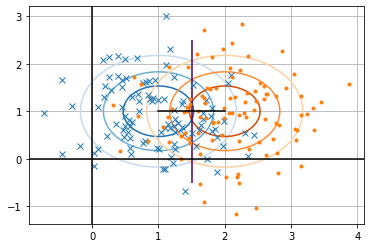

In [0]:
#@title For the diagonal case:
# Dist 1
mu_1 = np.array([1, 1])
cov_1 = .5*np.array([[1, 0], [0, 1]])
p_1 = .5
x_ps, y_ps, x,y,z = normal_scatter(mu_1, cov_1, p_1)
plt.plot(x_ps,y_ps,'x')
plt.contour(x, y, z, cmap='Blues', levels=3)

# Dist 2
mu_2 = np.array([2, 1])
#cov_2 = np.array([[2, -1], [-1, 1]])
cov_2 = cov_1
p_2 = .5
x_ps, y_ps, x,y,z = normal_scatter(mu_2, cov_2, p_2)
plt.plot(x_ps,y_ps,'.')
plt.contour(x, y, z, cmap='Oranges', levels=3)

# Decision Boundary
X = np.empty(x.shape + (2,))
X[:, :, 0] = x; X[:, :, 1] = y
g = np.log(p_1*calc_p_normal(X, mu_1, cov_1)) - np.log(p_2*calc_p_normal(X, mu_2, cov_2))


plt.contour(x, y, g, [0])

plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot([mu_1[0], mu_2[0]], [mu_1[1], mu_2[1]], 'k')
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


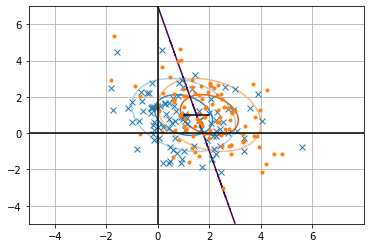

In [0]:
#@title For the non-diagonal case
# Dist 1
mu_1 = np.array([1, 1])
cov_1 = np.array([[2, -1], [-.5, 2]])
p_1 = .5
x_ps, y_ps, x,y,z = normal_scatter(mu_1, cov_1, p_1)
plt.plot(x_ps,y_ps,'x')
plt.contour(x, y, z, cmap='Blues', levels=3)

# Dist 2
mu_2 = np.array([2, 1])
#cov_2 = np.array([[2, -1], [-1, 1]])
cov_2 = cov_1
p_2 = .5
x_ps, y_ps, x,y,z = normal_scatter(mu_2, cov_2, p_2)
plt.plot(x_ps,y_ps,'.')
plt.contour(x, y, z, cmap='Oranges', levels=3)

# Decision Boundary
X = np.empty(x.shape + (2,))
X[:, :, 0] = x; X[:, :, 1] = y
g = np.log(p_1*calc_p_normal(X, mu_1, cov_1)) - np.log(p_2*calc_p_normal(X, mu_2, cov_2))


plt.contour(x, y, g, [0])

plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot([mu_1[0], mu_2[0]], [mu_1[1], mu_2[1]], 'k')
plt.show()


The diagonal $\Sigma$ case corresponds to uncorrelate or independent features, which is the __Naive Bayes__ assumption. 

# Naive Bayes Classification

As we have discussed above, Bayes Theorem can be used with generative models to estimate class assignments probabilities. Under the umbrella of the Bayesian framework, the most important pdf to calculate is the likelihood, which enables to calculate the class posteriors. It is relatively easier to calculate (or even drop) the samples prior $P(X)$ or the class priors $P(y_i)$. 

We can also put further assumptions to simplify the analysis and the computation of the likelihood $P(X|y_i;\theta)$. 

In general the likelihood term can be detailed as:

$$P(X|y_i) = P(x_1, x_2,...x_n|y_i)$$

Let $X = [x_1, x_2,....x_{n}]$ be a discrete random variable. 

__Curse of dimensionality__

The calculation of the above joint pdf requires to model all interactions (combinations) of $x_1, x_2,....x_{n}$. 

Let's take an example of $x_i \in {0,1}$. If $n=1$, then we need 2 points to model $x_1$ (2 points on a line). If $n=2$, then we need 4 points to model all the combinations of $x_1,x_2$ (4 points on a square).  If $n=3$, then we need 8 points to represent all combinations of $x_1,x_2,x_3$ (8 points on cube vertices).

So for $k$ samples to represent every $x_i$ (this represents the dimension of the sample space for each random variable), then we need $k^n$ samples to fully model the above term. 

This exponential growth of samples is called the __curse of dimensionality__.

Moreover, dimensionality growth increases __data sparsity__. As a rule of thumb, the sparstiy of data also grows exponentially with the growth of dimensions. For example, the distance between the furthest 2 points on a 1D space (line) is smaller than that between them in 2D (square) and 3D (cube) spaces. This means that the density of points decreases, and we need more points to cover the space. This is also a reason why we always seek __dimensionality reduction__ and simpler features.


If we assume that $x_1, x_2,....x_{n}$ are independent, we can write the likelihood as:

$$P(X|y_i) = \prod_{j=1}^n P(x_j|y_i)$$

This breaks the exponential term; $k^n$ samples, into $k \times n$.

However, this assumption is not always true, and might be agressive or __Naive__ in many cases, since we cannot always assume that there's correlation between features. Hence the name __Naive Bayes__.

__GDA and Naive Bayes__

We can understand the impact of the Naive assumption using the GDA framework (Bayes + Normal distribution model for likelihood).

In this case, the Naive assumption maps to diagonal covariance $\Sigma = \sigma^2 I$, which means that the likelihood will be:

$$P(X|y_i) = \prod_{j=1}^n P(x_j|y_i) = \frac{1}{(2\pi)^{n/2} \sigma} exp (-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_j-\mu_i)^T(x_j-\mu_i))$$

As we have seen with the min distance classifier, this translates to computing the __Euclidean distance__ from the input sample to the mean of every class distribution $\mu_i$:

$$d_i(X) = (X-\mu_i)^T(X-\mu_i) = ||(X-\mu_i)||$$

If we don't have the Naive assumption then we have to calculate the _Mahalanobis distance_ instead. But also, we need much more samples to model the distribution.


# Multi-classes and Softmax Regression

__Again, don't be confused with the "Regression" in the name, it's still a classification problem__

Following the same steps we used to combine and normalize $\hat{P_1}$ and $\hat{P_2}$ using Bernoulli distributions, we can generalize that to any number of $k$ classes. Let:

$$\phi_i = P(y=y_i,x) = \frac{\hat{P_i}}{\sum_{j=1}^k \hat{P_j}}$$

Where $\hat{P_i}$ is the unnormalized probability score of class $y_i$ as follows:

$$\hat{P_i}(x, y=y_i)=P(y=y_i).P(x|y=y_i)$$
So we can define a multinomial distribution over the random variable $y \in {y_1, y_2,...y_k}$ as:

$$P(y,x) = \prod_{j=1}^k \phi_j^{T(y)^j}$$

$$\sum_{j=1}^k \phi_j = 1$$

Where $T(y)$ is the __One-Hot-Encoding (OHE)__ mapping of the class label $y$ into OHE vector. $T(y) \in \Bbb{R}^k$. For class label $y = j$, $T(y)$ has only 1 at the index of class label $j$ and the rest are 0's.

For $k=2$, we restore the Bernoulli distribution formula.

In general, we can assume every $\hat{P_i}$ to take the following form:

$$\hat{P_i} = exp(S_i)$$

Where $S_i$ is a scoring function for class $i$. In this setting, it is not necessary that $\hat{P_i}$ corresponds to a true probability anymore; i.e. $\hat{P_i} \neq \hat{P_i}(x, y=y_i)$, but just _unnormalized_ score.

$S_i$ is also referred to as the __logit__, because:

$$S_i = log \hat{P_i}$$

Now, we can re-write $\phi_i$ as:

$$\phi_i = P(y=y_i,x) = \frac{exp(S_i)}{\sum_{j=1}^k exp(S_j)}$$

Which is the formula of __Softmax Regression__. We can assume the score functions to be of any shape. It could linear for instance:

$$S_i = h_{\theta_i}(X) = \theta_i^TX$$

Hence:

$$\phi_i = P(y=y_i,x) = \frac{exp(\theta_i^TX)}{\sum_{j=1}^k exp(\theta_j^TX)}$$

The true class is just:

$$i = argmax_i \phi_i$$
For $i \in [1,k]$


For binary case, we can write as:
$$\phi = P(y=y_1,x) = \frac{1}{1 + exp^{-(S_1-S_2)}}$$

But we don't really need two scores, we can simply assume $\theta_2 = [0]$ and  
so for linear case we get:
$$\phi = P(y=y_1,x) = \frac{1}{1 + exp^{-h_\theta(X)}}=\frac{1}{1 + exp^{-\theta^TX}}$$


Which is the formula of LogReg



# Generalized Linear Models 

The above derivations apply to any family of probability distributions that take the form of exponential of the random variable for $P(X|y)$, where in this case the exponent in the discriminant function vanishes with the log. This is called the _exponential family_. The Gaussian or normal is just an example of it.

They takes the form:

$$P(x;\theta) = b(x)exp^{\theta^TT(x)-a(\theta)}$$


For the Gaussian with $\Sigma = I$ or $\sigma^2=1$, we have:

$$\theta = \mu$$
$$T(x) = x$$
$$a(\theta) = \mu^2/2$$
$$b(\theta) = \frac{1}{\sqrt{2\pi}} exp^{-x^2/2}$$

If we substitute in the formula we get:
$$P(x;\mu) = \frac{1}{\sqrt{2\pi}}exp^{-\frac{1}{2}x^2}exp^{\mu x-\frac{1}{2}\mu^2} = \frac{1}{\sqrt{2\pi}}exp^{-\frac{1}{2}(x-\mu)^2}$$



# References
- http://cs229.stanford.edu/notes/cs229-notes1.pdf
- http://cs229.stanford.edu/notes/cs229-notes2.pdf
- https://www4.stat.ncsu.edu/~davidian/st732_sp2007/notes/chap3.pdf
- https://link.medium.com/fuycZjJy42
